# CSE 7324 Lab Assignment One: Exploring Table Data

Minging Li, Jiayin Liu, Tianlei Xu, He Zhou       Feb.04, 2018

## 1. Business Understanding

The data set studied in this project is a 2014 Mental Health in Tech Survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace (1). The survey is conducted annually by Open Sourcing Mental Illness (OSMI), a non-profit corporation dedicated to raising awareness, educating, and providing resources to support mental wellness in the tech and open source communities (2). The survey is a voluntary online survey that can be accessed in https://osmi.typeform.com/to/XYupsC. The 2014 survey received over 1200 responses, including those from 48 countries, 60% of which are from United States. 

A recent study conducted by the National Institute of Mental Health (NIMH) claims that one in six adults aged 18 or older in United States lives with a mental illness (44.7 million in 2016) (3). The purpose of the data set in our study is to learn the prevalence of mental health illness in tech workplace, measure worker’ attitudes toward mental health, and study employer’ support toward mental health. Study of the data set would help people in tech workplace answer several questions that they are concerned about:

1. Which gender have higher frequency of mental health illness, male or female? 
2. Is prevalence of mental health disorder different among different age group?
3. Are employees able to get treatment if they have mental illness?
4. Is mental health illness less prevalent in companies that provide good health and wellness benefits toward mental health?

Our task of this study is to predict mental health conditions (health or not) in tech workplace. For employees, the prediction model would help them self-diagnose if they are among the high risk groups of mental disorder. Also, it would help employees select an employer based on the companies’ policies about self care and quality of their overall health and well ness benefits. In another hand, it would help employers make better policies to reduce the prevalence of mental disorder and attract more employees. 

Since our prediction is a classification model, the predicted mental health conditions would be three categories, “healthy”, “not healthy”, or “maybe”. In order to help employees self-diagnose, the algorithm should be able to find the best pattern it can. It cold be misleading if the algorithm is not able to classify the mental health conditions very well. There are more than 20 attributes in the data, it is possible that not all of the attributes are important or relevant to mental health. The algorithm should be able to find good predictors in order to help employers include these factors in their policy to improve mental health conditions. 

## 2. Data Understanding

First we import several packages and read the CSV file into Python.

In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv('/Users/jiayinliu/Desktop/study/ML/proj1/survey.csv')
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/14 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/14 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/14 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/14 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/14 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,8/27/14 11:31,33,Male,United States,TN,NaN,Yes,No,Sometimes,25-Jun,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,8/27/14 11:31,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,5-Jan,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,8/27/14 11:32,39,M,Canada,NaN,NaN,No,No,Never,5-Jan,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,8/27/14 11:32,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,8/27/14 11:32,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


### 2.1 Features and Data types

Let's preview and examine the data set. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

The data set has 1259 rows and 27 collumns. Since we will treat mental health consequence as our labels, there are 1259 entries and 26 features. The data set includes two data types, integer (shown as int64) and string (shown as object in pandas dataframe).

The attribute "age" is the age of adults who took the survey. The data type of Age is Ratio, ranging from 18-72. 
Gender has two values, either male or female, which is Norminal. 
The attribute "country" is the respondent country, the type of which is Norminal. The respondents are from 46 countries. 
The attribute "fmily_history" show if the respondent have a family history of mental illness. The value is yes or no, thus it is Norminal. 
The attribute "no_employees" is the number of employees the respondent's company or organization have? It has five values, 0-5, 6-15, 26-100, 100-500, 500-1000, more than 1000. The type of "no_employees" is Ordinal. 
The attribute "benefits" shows if the employer's company provide mental health benefits. The values of it are "yes", "no", and "don't know" and the type is Nominal. 

### 2.2 Data Quality

We use missingno package to find the missing data

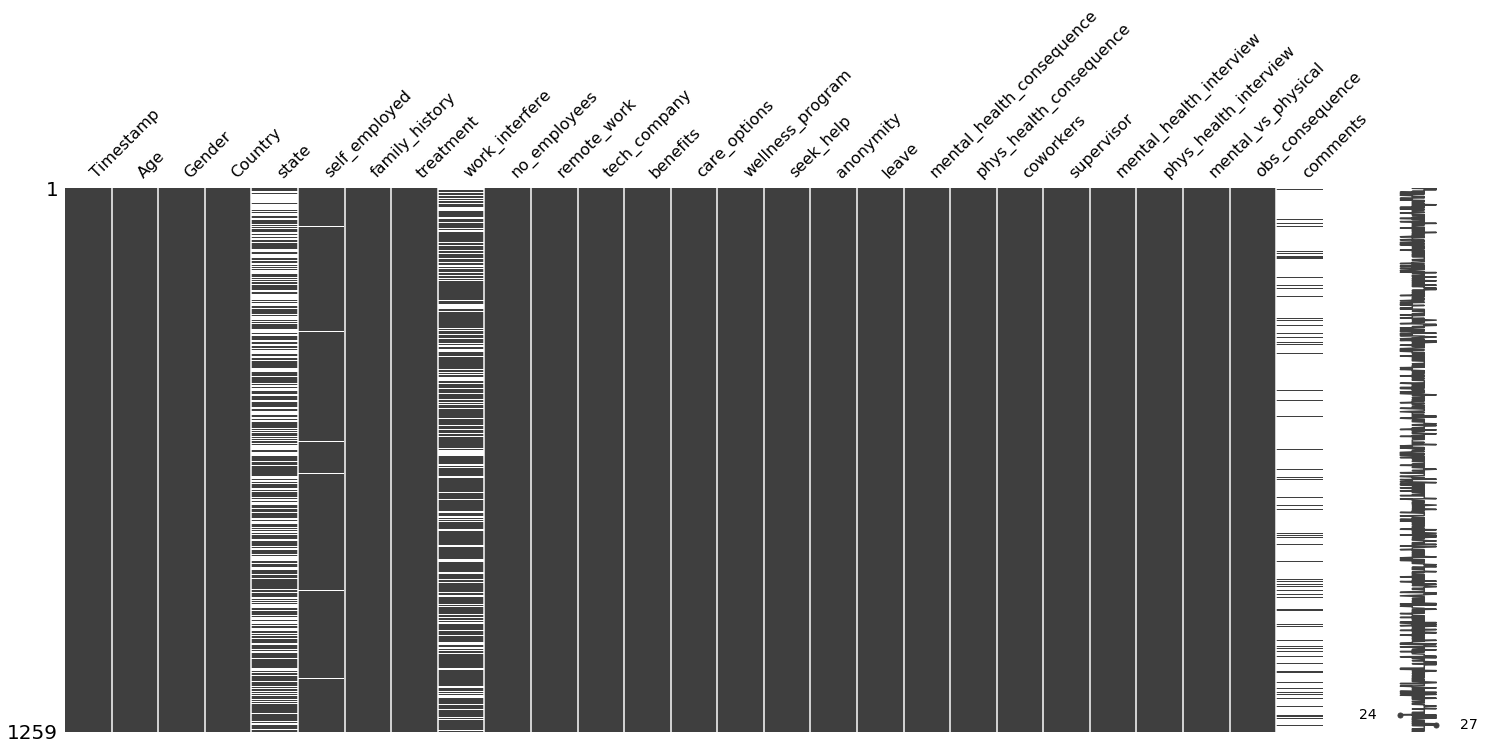

In [4]:
import missingno as mn
mn.matrix(df.sort_values(by=['Age']))

According to the missing data graph above, we can see that there are many missing data in 'state','work_interfere','comments'.
These features may be influencial features but we can not impute these data according to the data set.
So we decide to throw away these features.


After analyzing the remaining features, we delete some less influencial features

In [5]:
del df['Timestamp']
del df['state']
del df['work_interfere']
del df['care_options']
del df['leave']
del df['coworkers']
del df['supervisor']
del df['mental_health_interview']
del df['phys_health_interview']
del df['mental_vs_physical']
del df['obs_consequence']
del df['comments']
del df['tech_company']
del df['anonymity']
del df['self_employed']

We view the values of each feature in the data set. 

In [6]:
obj_info_list = df.select_dtypes(include=['object']).columns.tolist()
for col in obj_info_list:
    print('{}: \n{}\n'.format(col, df[col].unique()))

Gender: 
['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']

Country: 
['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania' 'Belgium'
 'New Zealand' 'Zimbabwe' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria' 'Croat

The attribute no_employees contains two weired values "5-Jan" and "25-Jun". We have figured out that it was because the csv file treated the values as date type. The "5-Jan" should be "1-5" and "25-Jun" should be "6-25". Several attributes contain values "yes", "no" "don\'t know". In order to better vasualize the attributes, we use integer to represent the values. For example, we use "1" to present "yes", "0" for "no", and "2" for "Don\'t know" or "Maybe". We also use number 1-6 to represent 6 ranges of no_employees.  

In [7]:
df.family_history.replace(to_replace=['Yes','No'],value=[1,0], inplace=True)
df.treatment.replace(to_replace=['Yes','No'],value=[1,0],inplace=True)
df.remote_work.replace(to_replace=['Yes','No'],value=[1,0],inplace=True)
df.wellness_program.replace(to_replace=['Yes','No','Don\'t know'],value=[1,0,2],inplace=True)
df.benefits.replace(to_replace=['Yes','No','Don\'t know'],value=[1,0,2],inplace=True)
df.seek_help.replace(to_replace=['Yes','No','Don\'t know'],value=[1,0,2],inplace=True)
df.mental_health_consequence.replace(to_replace=['Yes','No','Maybe'],value=[1,0,2],inplace=True)
df.phys_health_consequence.replace(to_replace=['Yes','No','Maybe'],value=[1,0,2],inplace=True)
df.no_employees.replace(to_replace=['5-Jan','25-Jun','26-100','100-500','500-1000','More than 1000'],value=range(6),inplace=True)

The attribute gender contains more than two values. We have figured out it was caused by the way to write a gender is not uniform in the data set. For example, "female", "f", "F", "woman", and "Woman" all represent gender "Female". We replace all the values by "Female". We use the similar method for male. There are also instances in which gender is unclear. Since gender is an important feature, we delete those instances.  

In [8]:
df.Gender.replace(to_replace=['female','f','F','woman','Woman'],value=['Female','Female','Female','Female','Female'],inplace=True)

In [9]:
df.Gender.replace(to_replace=['male','M','m','man','Man'],value=['Male','Male','Male','Male','Male'],inplace=True)

In [10]:
df

,Age,Gender,Country,family_history,treatment,no_employees,remote_work,benefits,wellness_program,seek_help,mental_health_consequence,phys_health_consequence
0,37,Female,United States,0,1,1,0,1,0,1,0,0
1,44,Male,United States,0,0,5,0,2,2,2,2,0
2,32,Male,Canada,0,0,1,0,0,0,0,0,0
3,31,Male,United Kingdom,1,1,2,0,0,0,0,1,1
4,31,Male,United States,0,0,3,1,1,2,2,0,0
5,33,Male,United States,1,0,1,0,1,0,2,0,0
6,35,Female,United States,1,1,0,1,0,0,0,2,2
7,39,Male,Canada,0,0,0,1,0,0,0,0,0
8,42,Female,United States,1,1,3,0,1,0,0,2,0
9,23,Male,Canada,0,0,2,0,2,2,2,0,0


Then we use 1 to represent Female, 0 to represent Male and delete instances without clear gender information.

In [11]:
df.Gender.replace(to_replace=['Female','Male'],value=[1,0],inplace=True)

In [12]:
df=df[df['Gender'].isin([1])|df['Gender'].isin([0])]

In [13]:
df.Gender.value_counts()

0    973
1    240
Name: Gender, dtype: int64

There are 973 female and 240 male.  

We then take a look at the values of countries. 

In [16]:
df.Country.value_counts()

United States             722
United Kingdom            178
Canada                     69
Germany                    43
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Switzerland                 7
Poland                      7
Sweden                      7
Brazil                      6
South Africa                6
Belgium                     6
Israel                      5
Italy                       5
Singapore                   4
Bulgaria                    4
Mexico                      3
Finland                     3
Austria                     3
Colombia                    2
Croatia                     2
Greece                      2
Portugal                    2
Russia                      2
Denmark                     2
Georgia                     1
Spain                       1
Moldova                     1
Latvia                      1
Hungary   

The respondent are from 46 countries. 722 respondent are from United States, 60% of the total respondents. The top 10 countries contains 1118 respondents, 92.2% of total. There are a bunch of countries have one or two respondent from each country. These instances have little value to represent the respondent from these countries. Thus we only keep the instances from the top 10 countries.

In [17]:
country=df.Country.value_counts().head(10)
df=df[df['Country'].isin(country.index)]

In [18]:
df.Country.value_counts()

United States     722
United Kingdom    178
Canada             69
Germany            43
Netherlands        27
Ireland            27
Australia          21
France             13
India              10
New Zealand         8
Name: Country, dtype: int64

The age of some respondents have abnormal value, such as -127 or 9999. Those could be typo. We delete the instances with age value either smaller than 18 or larger than 100. 

In [19]:
df=df.drop(df[df['Age']>100].index)
df=df.drop(df[df['Age']<18].index)

In [20]:
#df['Age']=pd.cut(df['Age'],[0,20,30,40,50,1000],labels=['below 20','20-30','30-40','40-50','more than 50'])

The final data set is as below:

In [21]:
df

,Age,Gender,Country,family_history,treatment,no_employees,remote_work,benefits,wellness_program,seek_help,mental_health_consequence,phys_health_consequence
0,37,1,United States,0,1,1,0,1,0,1,0,0
1,44,0,United States,0,0,5,0,2,2,2,2,0
2,32,0,Canada,0,0,1,0,0,0,0,0,0
3,31,0,United Kingdom,1,1,2,0,0,0,0,1,1
4,31,0,United States,0,0,3,1,1,2,2,0,0
5,33,0,United States,1,0,1,0,1,0,2,0,0
6,35,1,United States,1,1,0,1,0,0,0,2,2
7,39,0,Canada,0,0,0,1,0,0,0,0,0
8,42,1,United States,1,1,3,0,1,0,0,2,0
9,23,0,Canada,0,0,2,0,2,2,2,0,0


## 3. Data Visualizaiton

### 3.1 Feature Exploring

First，we take a look at the overall distribution of attributes to have a general impression of impact of each attribution. This would be beneficial to our later discussion. 

In [22]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

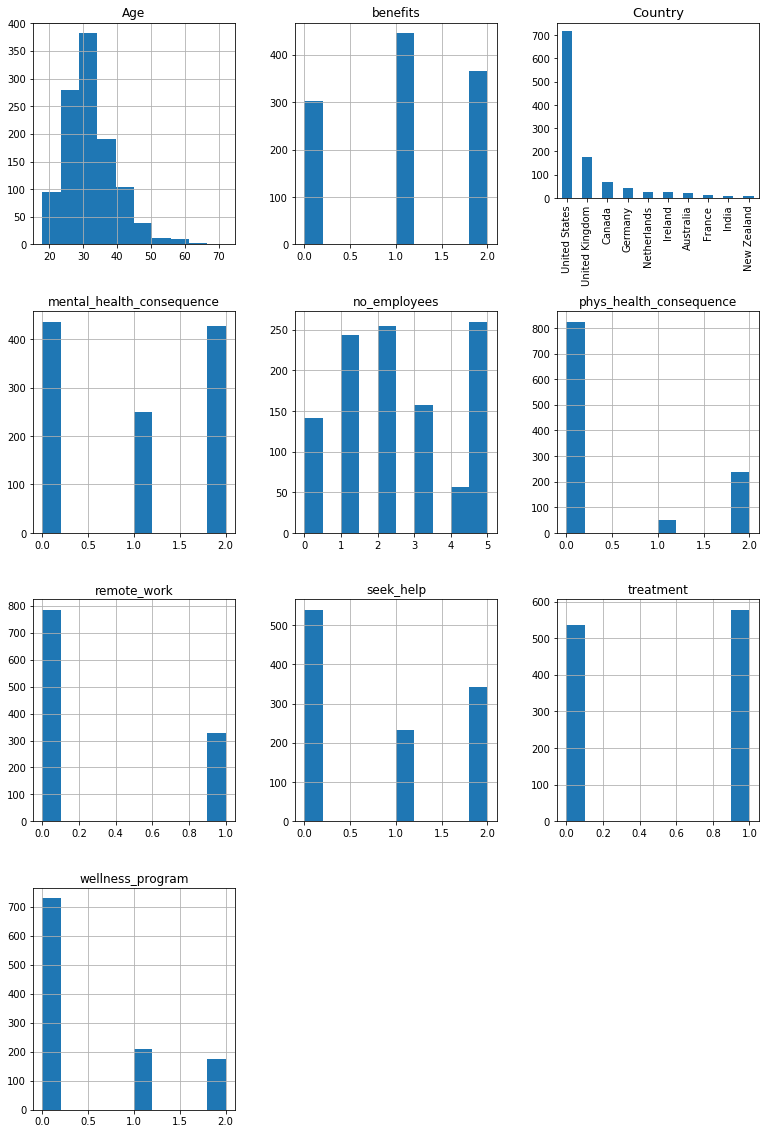

In [23]:
df.hist(figsize=(13,20))
p1=plt.subplot(533)
p1=df.Country.value_counts().plot(kind='bar')
p1.set_title("Country",fontsize=13)
plt.show()

We plot the hisgrams for 10 of the attributes. We can have some prelimenary conslusions from these hisgrams. Age of the major respondents ranges from 25 to 38. The top three countries with most respondent are from United States, United Kingdom, and Canada. Half of the respondents are able to get treatment. Most of the companies don't have wellness program. 

## 3.1.1 Country

In the beginning we talk about the distribution of the data in the world. Then we show the relation between the country and mental health consequence.  

In [24]:
df.Country.value_counts()

United States     718
United Kingdom    177
Canada             69
Germany            43
Netherlands        27
Ireland            27
Australia          21
France             13
India              10
New Zealand         8
Name: Country, dtype: int64

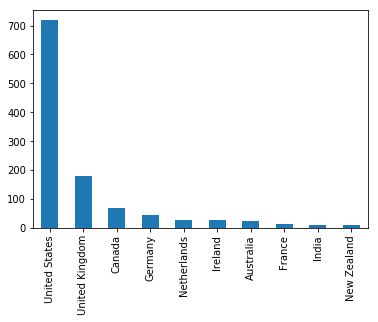

In [25]:
df['Country'].value_counts().plot.bar()
plt.show()

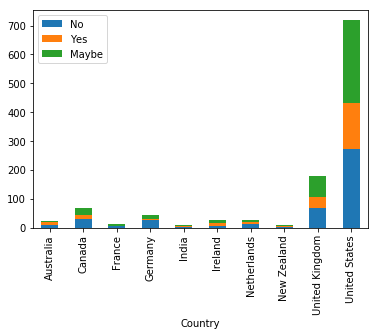

In [26]:
health_country=pd.crosstab(df['Country'],df['mental_health_consequence'])
health_country.plot(kind='bar',stacked=True)
plt.legend(labels=['No','Yes','Maybe'],loc='best')
plt.show()

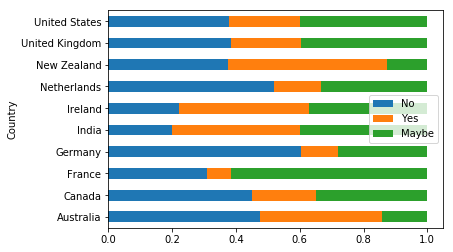

In [27]:
health_country_rate=health_country.div(health_country.sum(axis=1).astype(float),axis=0)
health_country_rate.plot(kind='barh',stacked=True)
plt.legend(labels=['No','Yes','Maybe'],loc='best')
plt.show()

As we can see from the chart, most of the respondant come from United State, then the region with the second amount is the United Kingdom. The others come from Canada, Germany or somewhere else. Compared the pecentage of mental health, the New Zealand seems has the highest percentage of mental problem. The india seems has the lowest percentage of mental problem. The majority of informants from France seem not sure about their mental situation. 

Since the sample of the survey is not randomly chosen from each country. The respondents are self-selected. They don't represent employees from their country. The result can only be applied to this data set and can not be extended to any larger population. 

## 3.1.2 Family History

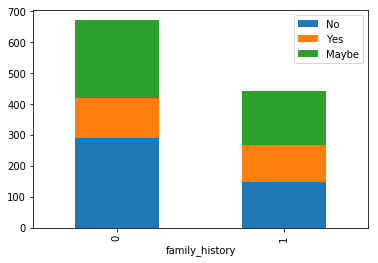

In [28]:
family_history=pd.crosstab(df['family_history'],df['mental_health_consequence'])
family_history.plot(kind='bar',stacked=True)
plt.legend(labels=['No','Yes','Maybe'],loc='best')
plt.show()

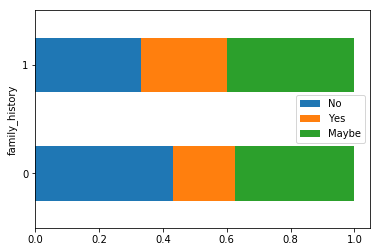

In [29]:
family_history_1=family_history.div(family_history.sum(axis=1).astype(float),axis=0)
family_history_1.plot(kind='barh',stacked=True)
plt.legend(labels=['No','Yes','Maybe'],loc='best')
plt.show()

In the second we talk about the factor of family history. The '1' represent the informant has mental disorder while the '0' represent that doesn't have. Among all the informats, most of them don't have family history or not sure if they have family history of mental disorder. The percentages of employees who have family history are a little higher among the that have mental health illness. The mental health might have correlation with family history. 

## 3.1.3 Treatment

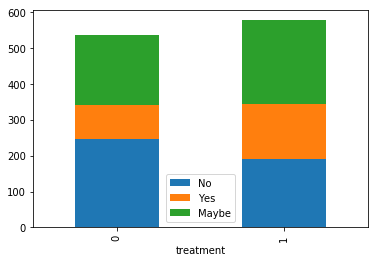

In [30]:
treatment=pd.crosstab(df['treatment'],df['mental_health_consequence'])
treatment.plot(kind='bar',stacked=True)
plt.legend(labels=['No','Yes','Maybe'],loc='best')
plt.show()

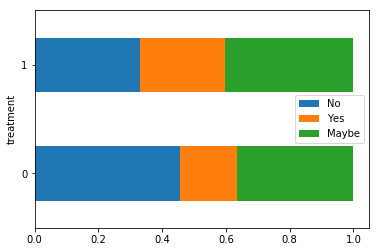

In [31]:
treatment_1=treatment.div(treatment.sum(axis=1).astype(float),axis=0)
treatment_1.plot(kind='barh',stacked=True)
plt.legend(labels=['No','Yes','Maybe'],loc='best')
plt.show()

30% of the respondents that have mental illness have thought about getting treatment, 30% of those are not, and 40% have answered maybe. It seems that people with treatment seems has more percentage of mental problem. However, this is because the respondents who have mental illness prefer to seek for treatment. 18% of who don't have mental illness have thought about seeking treatment.   

## 3.1.4 Number of Employees

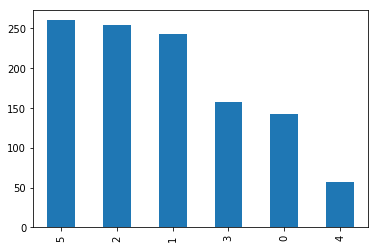

In [32]:
df['no_employees'].value_counts().plot.bar()
plt.show()

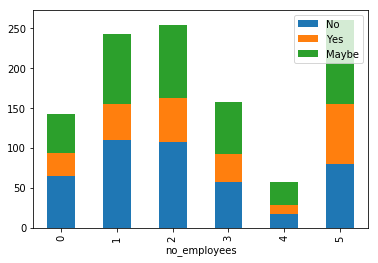

In [33]:
no_employees=pd.crosstab(df['no_employees'],df['mental_health_consequence'])
no_employees.plot(kind='bar',stacked=True)
plt.legend(labels=['No','Yes','Maybe'],loc='best')
plt.show()

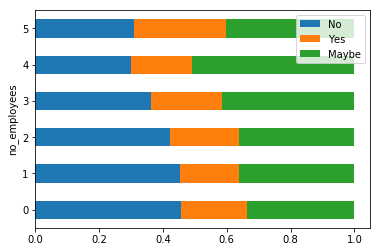

In [34]:
no_employees_r=no_employees.div( no_employees.sum(axis=1).astype(float),axis=0)
no_employees_r.plot(kind='barh',stacked=True)
plt.legend(labels=['No','Yes','Maybe'],loc='best')
plt.show()

The next factor we talk about is the number of employees in the workspace. As we know, the workspace with more employees would result in more pressure, and the chart also shows as we expect. In the diagram, the workspace with emplyees of 1 to 5 would result in less percentage of mental problem. To the opposite, the people work with more than 1000 employees will have the highest possibilitiy to cause mental problem.

## 3.1.5 Age and Gender

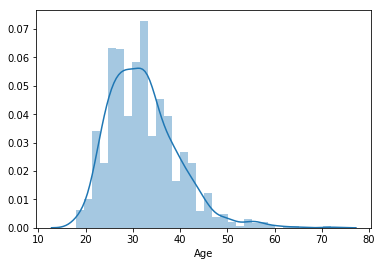

In [35]:
sns.distplot(df.Age)
plt.show()

The informants where the data from consentrate on the range from 20 to 40.The result is clearer form the box plot. Also, this is the age range which has the highest possibility of mental problem, so it is the main area we should do research on. 

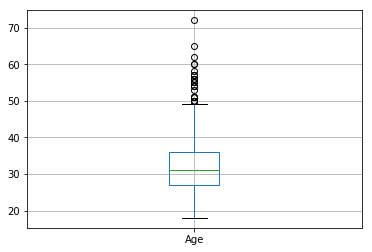

In [36]:
df.boxplot('Age')
plt.show()

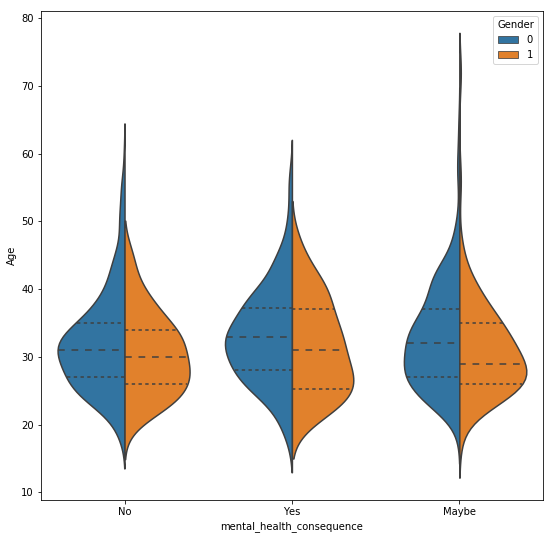

In [37]:
plt.subplots(figsize=(9, 9))   # In order to set the size of the graph
g=sns.violinplot(x="mental_health_consequence", y="Age", hue="Gender", data=df, legend_out=True,
               split=True, inner="quart")
g.set_xticklabels(["No","Yes","Maybe"])
plt.show()

This violin graph show the difference between male and female. From the chart, the average age for women who have mental problem is lower than the male. It seems that younger women suffers more pressure. 
With the increase of the age, people become more familiar with their mental condition. The percentage of 'Maybe' becomes lower and lower.

### 3.1.6 Number of emloyees and Gender

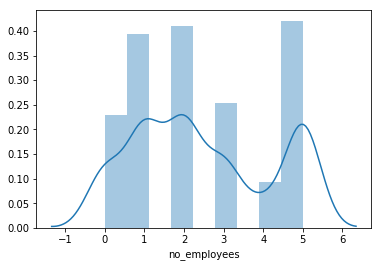

In [38]:
sns.distplot(df.no_employees)
plt.show()

In the chart, '0,1,2,3,4,5' respectively present the number of employees of '1-5,6-25,26-100,100-500,500-1000,more than 1000'. From the chart， the number of employees ditributes equally.

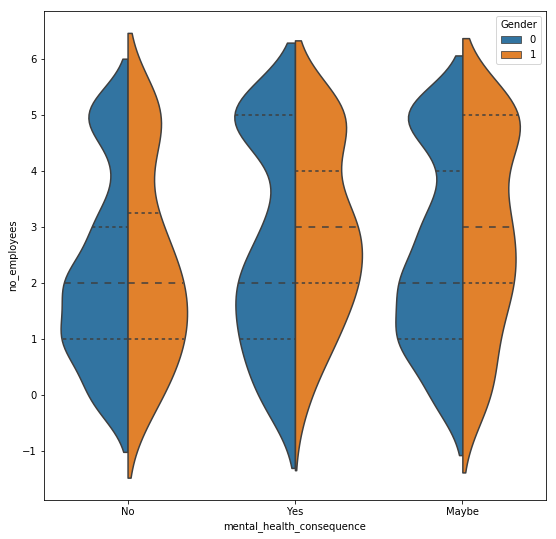

In [39]:
plt.subplots(figsize=(9, 9))   # In order to set the size of the graph
g=sns.violinplot(x="mental_health_consequence", y="no_employees", hue="Gender", data=df, legend_out=True,
               split=True, inner="quart")
g.set_xticklabels(["No","Yes","Maybe"])
plt.show()

We can know from the graph that, the male the cirumstance of 6-100 or 500-1000 seems have the highest possibilty to have mental problem. While the female seems prefer small gruop, when the number of employees more than 100 will press stress on them. 

### 3.1.7 Wellness Program

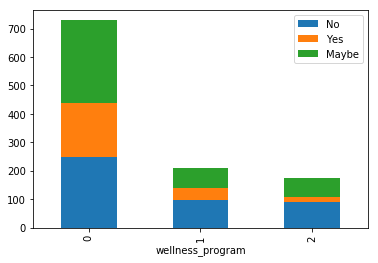

In [40]:
wellness_program=pd.crosstab(df['wellness_program'],df['mental_health_consequence'])
wellness_program.plot(kind='bar',stacked=True)
plt.legend(labels=['No','Yes','Maybe'],loc='best')
plt.show()

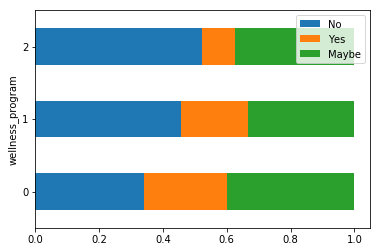

In [41]:
wellness_program_1=wellness_program.div(wellness_program.sum(axis=1).astype(float),axis=0)
wellness_program_1.plot(kind='barh',stacked=True)
plt.legend(labels=['No','Yes','Maybe'],loc='best')
plt.show()

Here, '0' means they look for the wellness program, '1' represents they don't, and '2' means they don't know it. We can conclude that wellness program is one key to avoid mental problem. The more they take, the less possiblity that they may have the mental problem. However,the people who don't know about it has the lowest percentage of mental problem. That could be explained that the people who don't have mental problem may not search for information about that---How optimstic they are.

### 3.1.8 Seek Help 

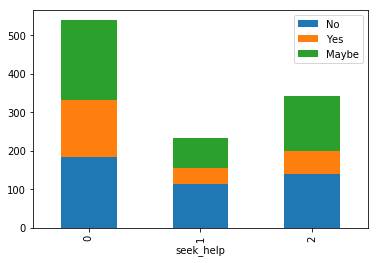

In [42]:
seek_help=pd.crosstab(df['seek_help'],df['mental_health_consequence'])
seek_help.plot(kind='bar',stacked=True)
plt.legend(labels=['No','Yes','Maybe'],loc='best')
plt.show()

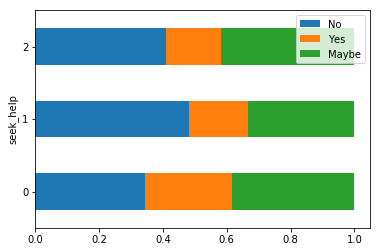

In [43]:
seek_help_1=seek_help.div(seek_help.sum(axis=1).astype(float),axis=0)
seek_help_1.plot(kind='barh',stacked=True)
plt.legend(labels=['No','Yes','Maybe'],loc='best')
plt.show()

Seek help seems more helpful in resolving mental problem. People would be much less possibility to have mental problem if they seek help.

### 3.2 Relationship Exploring

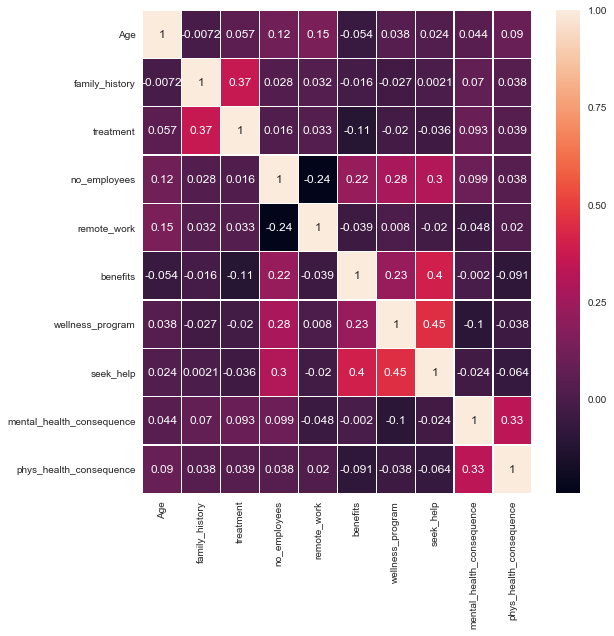

In [44]:
sns.set(style="darkgrid")
graph, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(df.corr(), annot=True,linewidths=0.3)
graph.tight_layout()
plt.show()

This is the overview of all the relationship between the attributions. The first graph contains all the variable from the raw data. The raw data also contains the consequence of physics consequence. From it we can see that, the consequence of mental and physic is tightly linked. The informant who has mental or physic problem would also has high possibility to have the other problem. To consentrate on the relationship between mental problem and other key factors, we build another graph.

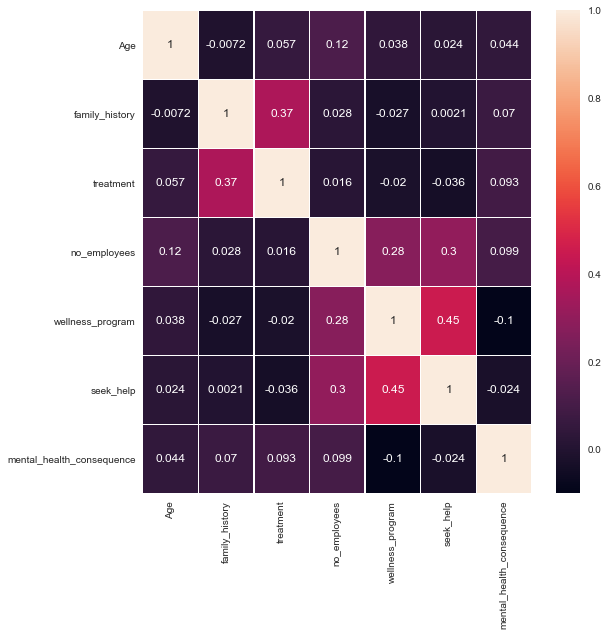

In [45]:
df_new=df[['Age','family_history','treatment','no_employees','wellness_program','seek_help','mental_health_consequence']]
sns.set(style="darkgrid")
graph, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(df_new.corr(), annot=True,linewidths=0.3)
graph.tight_layout()
plt.show()

This graph shows much clearer. However, from the graph, most of the variables don't have strong correlation. Among them, the strongest correlation is the number of employees and age. It is intuitive that the workspace and the change of age could result in problem. Family history and treatment has really low connected. To the opposite, wellness program and seek help have negative relation. 

Except this, the graph has many interesting relationship. The tightest relation is between wellness program and seek help. That is obvious because wellness program has been one kind of 'help', and the one who seeks for help would also be recommended wellness program. Alsp, seek help and wellness program are tightly related to the number of employees. That may because the larger company with more employees would have higher possibility to provide perfect equipment or service to help their employees.

Another tight relation is between family history and treatment. It seems that the informat with family history would know more about their body condition and try to cure themselves.

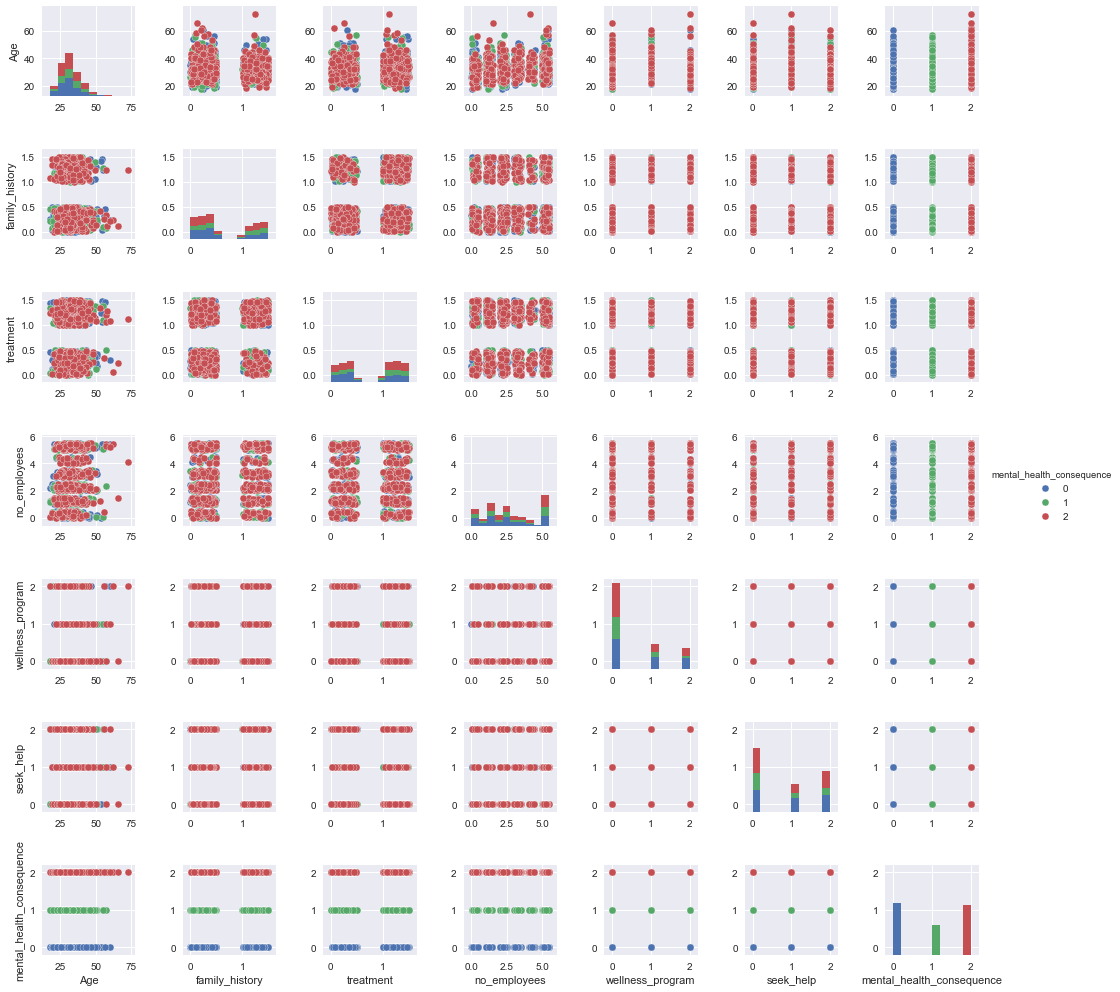

In [46]:
df_jitter = df_new.copy()
df_jitter[['Age','no_employees','family_history','treatment']] += np.random.rand(len(df_jitter),4)/2 
sns.pairplot(df_jitter, hue="mental_health_consequence", size=2)
plt.show()


Maybe because most of our variables are categorical, none of these features are good indicators for our target.The next, we would try to use t-SNE to reduce the dimensions and analysis more.

# 4.Exceptional Work

# 4.1 Definition of T-SNE

t-distributed stochastic neighbor embedding (t-SNE) is a machine learning algorithm for dimensionality reduction developed by Geoffrey Hinton and Laurens van der Maaten.[1] It is a nonlinear dimensionality reduction technique that is particularly well-suited for embedding high-dimensional data into a space of two or three dimensions, which can then be visualized in a scatter plot. Specifically, it models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points.

The t-SNE algorithm comprises two main stages. First, t-SNE constructs a probability distribution over pairs of high-dimensional objects in such a way that similar objects have a high probability of being picked, whilst dissimilar points have an extremely small probability of being picked. Second, t-SNE defines a similar probability distribution over the points in the low-dimensional map, and it minimizes the Kullback–Leibler divergence between the two distributions with respect to the locations of the points in the map. 



# 4.2 Execution of T-SNE


T-SNE doesn't work well for categorial datas, so firstly we exclude all categorical features.

In [53]:
df_pca = df.select_dtypes(exclude=['object']).copy()# delete categorical attributes
df_pca.head()

,Age,family_history,treatment,no_employees,remote_work,benefits,wellness_program,seek_help,mental_health_consequence,phys_health_consequence
0,37,0,1,1,0,1,0,1,0,0
1,44,0,0,5,0,2,2,2,2,0
2,32,0,0,1,0,0,0,0,0,0
3,31,1,1,2,0,0,0,0,1,1
4,31,0,0,3,1,1,2,2,0,0


In [55]:
x = df_pca.values
print('Shape of x: {}'.format(x.shape))

Shape of x: (1113, 10)


From above, we can see that our data is 9 dimensions.
As python has TSNE package, so it's easy to apply T-SNE algorithm to achieve dimensionality reduction(from 9 to 2). 

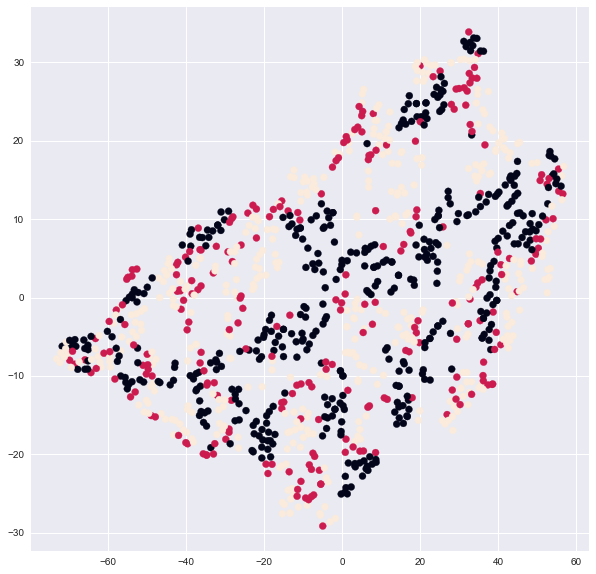

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

X_tsne = TSNE(learning_rate=100).fit_transform(df_pca)
plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:, 0],X_tsne[:, 1],c=df_pca.mental_health_consequence)
plt.show()

The result is not ideal.We can't get an ideal seperation. So we try to change the related critical parameters to get a better result.

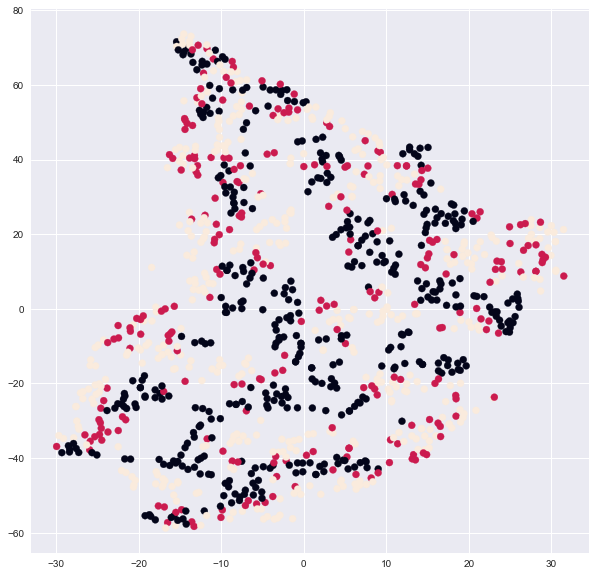

In [58]:
#change learning_rate to 1000
X_tsne = TSNE(learning_rate=1000).fit_transform(df_pca)
plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:, 0],X_tsne[:, 1],c=df_pca.mental_health_consequence)
plt.show()

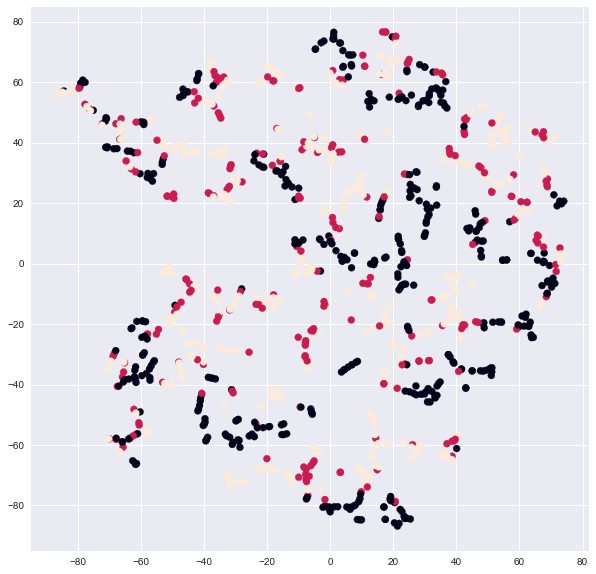

In [60]:
#change perplexity from default to 5
X_tsne = TSNE(perplexity=5).fit_transform(df_pca)
plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:, 0],X_tsne[:, 1],c=df_pca.mental_health_consequence)
plt.show()

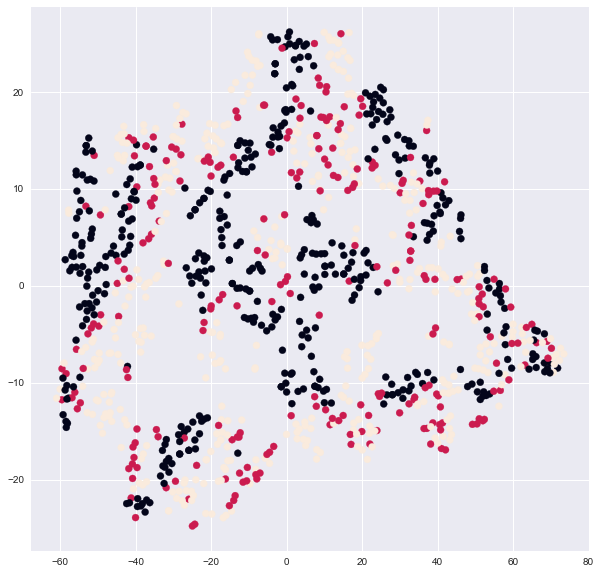

In [62]:
# change init from random to pca
X_tsne = TSNE(init='pca').fit_transform(df_pca)
plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:, 0],X_tsne[:, 1],c=df_pca.mental_health_consequence)
plt.show()

Whatever we do, we can't get clear seperation.We guess maybe people don't know the standard of mental health,so the mental health consequence is not accurate, and the amount of this dataset(only 1113 rows after cleaning）is still too small. All these factors lead to a bad result.

## Reference: 

1.	https://www.kaggle.com/osmi/mental-health-in-tech-survey
2.	About OSMI, https://osmihelp.org/about/about-osmi
3.	https://www.nimh.nih.gov/health/statistics/mental-illness.shtml
4.  https://github.com/eclarson/MachineLearningNotebooks/blob/master/03.%20DataVisualization.ipynb
5.  http://alexanderfabisch.github.io/t-sne-in-scikit-learn.html
6.  https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding